In [1]:
# import library/dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Reading Data From CSVs

In [2]:
train = pd.read_csv('./resources/train.csv')
test = pd.read_csv('./resources/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Running Heat Map - Missing Values

<AxesSubplot:>

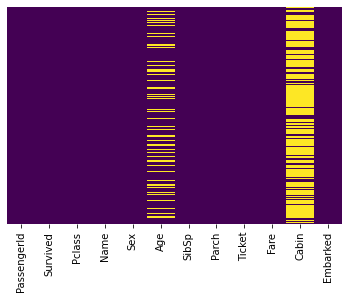

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

By running a heatmap we are able to see which columns had missing value and that seems to be Age and Cabin. Age is not missing many vaues and we can use a function to help fill in the gaps with the median age which is more resistant to outliers than the average (mean).
The Cabin column will be dropped as it has a lot of data missing and would cause damage to the model.

#### Survived[Red] to Dead [Blue] in Graph Format

<AxesSubplot:xlabel='Survived', ylabel='count'>

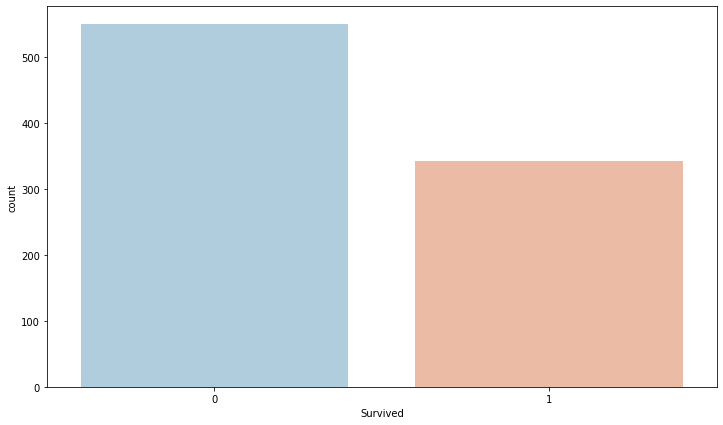

In [6]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Survived',data=train,palette='RdBu_r')

#### Survival Rates Based on Gender

<AxesSubplot:xlabel='Survived', ylabel='count'>

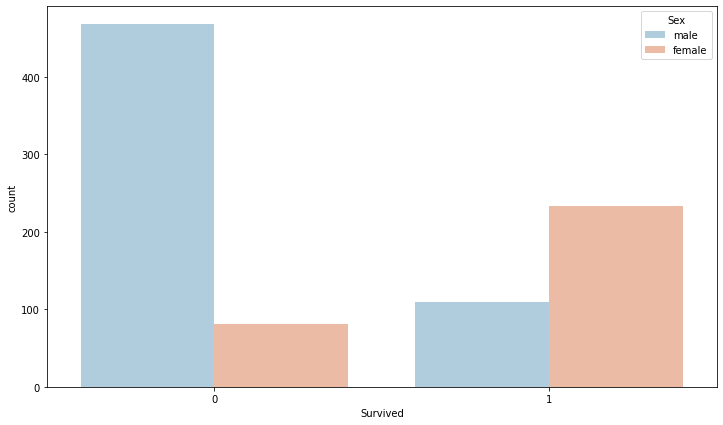

In [7]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

#### Survival Rate Based on Class [1st, 2nd, 3rd]

<AxesSubplot:xlabel='Survived', ylabel='count'>

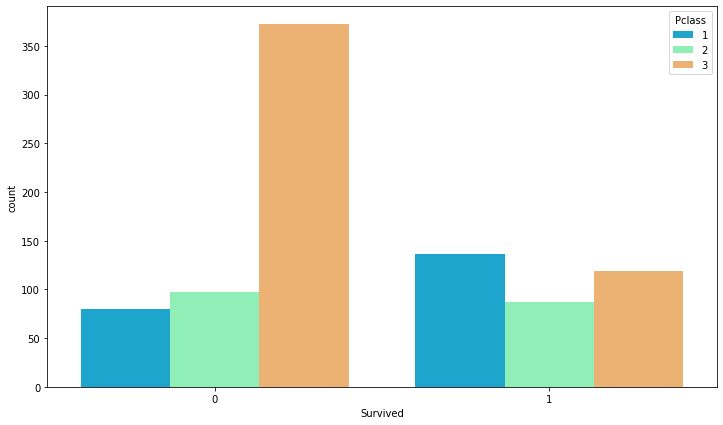

In [8]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

In [9]:
train.info()
print('*******************************************')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
*******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passen

#### Age Distribution of Passenger Class - TRAIN DATA

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

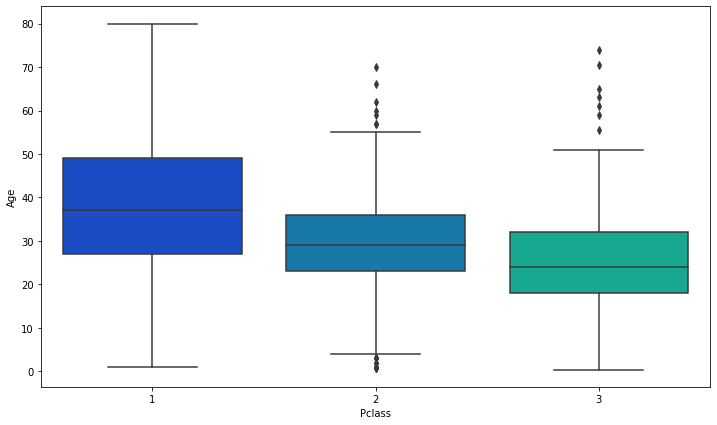

In [10]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

#### Age Distribution of Passenger Class - TEST DATA¶

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

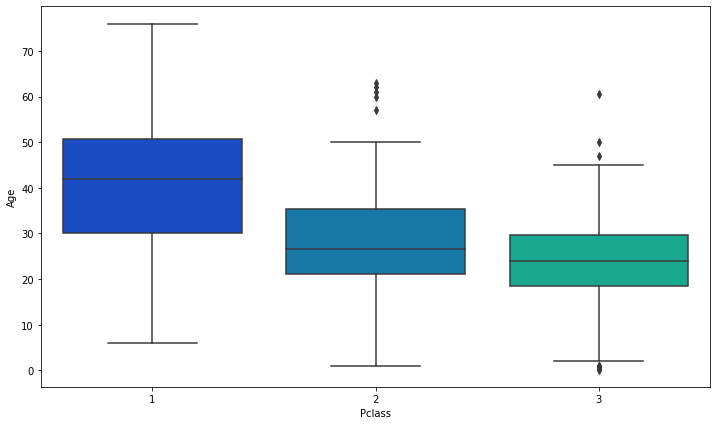

In [11]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=test,palette='winter')

#### Drop Unnecessary Columns

In [12]:
train= train.drop(['PassengerId','Name','Ticket'], axis=1)
test= test.drop(['Name','Ticket'], axis=1)

In [13]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [14]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S


### Conversion of Categorical Features

#### Embarked Column

In [15]:
# Get dummy values for both train and test dataset - there are 3 values in embarked: C, Q, S

# drop_first = True: Drop C column as it will be redudant because we can identify the embarked column from stops S and Q.
embark_train = pd.get_dummies(train['Embarked'],drop_first=True)
embark_test = pd.get_dummies(test['Embarked'], drop_first=True)

# Drop Embarked column for Cherbourg
train.drop(['Embarked'],axis=1,inplace=True)
test.drop(['Embarked'],axis=1,inplace=True)

# Concat new embark columns in respective datasets
train = pd.concat([train,embark_train],axis=1)
test = pd.concat([test, embark_test], axis=1)

#### Cabin Column

In [16]:
# Drop Cabin attribute from both the dataset
train.drop("Cabin",axis=1,inplace=True)
test.drop("Cabin", axis=1, inplace=True)

#### Gender Column

In [17]:
# 0 is for Female and 1 is for Male)

sex_train = pd.get_dummies(train['Sex'],drop_first=True)
sex_test = pd.get_dummies(test['Sex'], drop_first=True)

train.drop(['Sex'],axis=1,inplace=True)
test.drop(['Sex'],axis=1,inplace=True)

train = pd.concat([train,sex_train],axis=1)
test = pd.concat([test, sex_test], axis=1)

#### Fare

In [18]:
# this is only for test because there are missing values in "Fare"

test["Fare"].fillna(test["Fare"].median(), inplace=True)

#### Age

In [19]:
#We can see the rich passengers in the higher classes tend to be older. We'll use these mean age values to impute based on Pclass for Age.

# Function to Impute Age
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [20]:
# Apply the above function to our training and testing datasets
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

train['Age'] = train['Age'].astype(int)
test['Age']    = test['Age'].astype(int)

In [21]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,0,3,22,1,0,7.2500,0,1,1
1,1,1,38,1,0,71.2833,0,0,0
2,1,3,26,0,0,7.9250,0,1,0
3,1,1,35,1,0,53.1000,0,1,0
4,0,3,35,0,0,8.0500,0,1,1


In [22]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,892,3,34,0,0,7.8292,1,0,1
1,893,3,47,1,0,7.0000,0,1,0
2,894,2,62,0,0,9.6875,1,0,1
3,895,3,27,0,0,8.6625,0,1,1
4,896,3,22,1,1,12.2875,0,1,0


### Now the Data is cleaned and can be used to make a model

## Building The Model

In [23]:
# using the train-test split
x_train = train.drop('Survived', axis=1)
y_train = train['Survived']
x_test = test.drop('PassengerId', axis=1)

## Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
Prediction = lm.predict(x_test)

lm.score(x_train, y_train)

0.3995965772600035

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(x_train, y_train)
Prediction = logr.predict(x_test)
logr.score(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8035914702581369

## Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
RFC_prediction = random_forest.predict(x_test)
random_forest.score(x_train, y_train)

0.9820426487093153

## Final New DataFrame

In [29]:
final_edit = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": RFC_prediction
})

final_edit.to_csv('Result_update.csv', index=False)